# Emotion Detection Model using Keras

In [44]:
import numpy as np
import math
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
import h5py
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [16]:
def load_dataset():
    train_dataset = h5py.File('C:/Users/user/Downloads/train_happy.h5', "r")
    
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    test_dataset = h5py.File('C:/Users/user/Downloads/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [17]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [18]:
def EmotionModel(input_shape):
    
    X_input = Input(input_shape)
    X = ZeroPadding2D((3,3))(X_input)
    
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid',name='fc')(X)
    
    model = Model(inputs= X_input, outputs= X, name= 'HappyModel')
    
    return model

In [19]:
Emotion_model = EmotionModel(X_train.shape[1:])

In [20]:
Emotion_model.compile(optimizer= 'adam',loss= 'binary_crossentropy',metrics = ["accuracy"])

In [21]:
Emotion_model.fit(x = X_train, y = Y_train, epochs= 20, batch_size = 64)

Epoch 1/20
10/10 [==============================] - 9s 705ms/step - loss: 3.0515 - accuracy: 0.5126
Epoch 2/20
10/10 [==============================] - 11s 1s/step - loss: 0.9450 - accuracy: 0.6246
Epoch 3/20
10/10 [==============================] - 13s 1s/step - loss: 0.4455 - accuracy: 0.7944
Epoch 4/20
10/10 [==============================] - 12s 1s/step - loss: 0.3446 - accuracy: 0.8645
Epoch 5/20
10/10 [==============================] - 11s 1s/step - loss: 0.1927 - accuracy: 0.9186
Epoch 6/20
10/10 [==============================] - 11s 1s/step - loss: 0.1622 - accuracy: 0.9551
Epoch 7/20
10/10 [==============================] - 11s 1s/step - loss: 0.1126 - accuracy: 0.9677
Epoch 8/20
10/10 [==============================] - 12s 1s/step - loss: 0.1310 - accuracy: 0.9567
Epoch 9/20
10/10 [==============================] - 10s 957ms/step - loss: 0.0877 - accuracy: 0.9682
Epoch 10/20
10/10 [==============================] - 12s 1s/step - loss: 0.0781 - accuracy: 0.9742
Epoch 11/20
10

In [22]:
preds = Emotion_model.evaluate(x= X_test, y = Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 1s 90ms/step - loss: 0.3459 - accuracy: 0.8267
Loss = 0.34591060876846313
Test Accuracy = 0.8266666531562805


Person is Happy


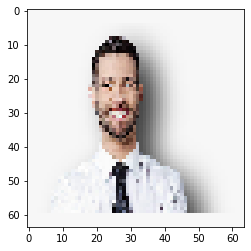

In [34]:
img_path1 = 'C:/Users/user/Downloads/happy_face.png'

img1 = image.load_img(img_path1, target_size=(64, 64))
imshow(img1)

x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

if Emotion_model.predict(x)[0][0]:
    print("Person is Happy")
else:
    print("Person is Sad")